# Technology shock - Further comments

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt price-flexibility](#toc3_1_)    
    - 3.1.1. [Production firms](#toc3_1_1_)    
    - 3.1.2. [Phillips-curve](#toc3_1_2_)    
    - 3.1.3. [Investments](#toc3_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') 

**Unpack namespaces:**

In [3]:
par = model.par                 
ss = model.ss                  
sol = model.sol                

**Define sensitivity parameter and values:**

In [4]:
parameter= 'eta'                                         # set parameter 
parameter_values = [0.,0.1,0.3]                          # set parameter values
models = model.multi_model(parameter,parameter_values)   # create one model for each value

Jacobian calculated in 1.0 mins 1 secs
Jacobian calculated in 26.6 secs
Jacobian calculated in 26.4 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

**Define shock:**

In [5]:
Tshock = 50                                                 # length of shock
persistence = 0.80**np.arange(Tshock)                       # persistence of shock   

In [6]:
for model_ in models:
    model_.set_exo_ss()                                                  
    model_.set_unknowns_ss()                                             
    model_.sol.Gamma[:Tshock] = model_.ss.Gamma*(1 + 0.01*persistence)   # shock to technology parameter
    model_.find_IRF()                                                    

initial:
t1-t0 = 0.01303 secs
it = 7
    max. abs. error = 1.69e-11
    1.95e-13 in A_R_ini_error
    6.66e-15 in Aq_diff
    1.43e-13 in FOC_capital_agency
    7.76e-12 in FOC_K_ell
    1.69e-11 in mkt_clearing
    1.50e-12 in PC

solve: t1-t0 = 0.08278 secs
evaluate + update: t3-t2 = 0.04388 secs
initial:
t1-t0 = 0.01097 secs
it = 7
    max. abs. error = 6.49e-11
    8.67e-13 in A_R_ini_error
    1.95e-14 in Aq_diff
    3.51e-13 in FOC_capital_agency
    2.09e-11 in FOC_K_ell
    6.49e-11 in mkt_clearing
    4.37e-12 in PC

solve: t1-t0 = 0.08378 secs
evaluate + update: t3-t2 = 0.04588 secs
initial:
t1-t0 = 0.01097 secs
it = 7
    max. abs. error = 2.27e-11
    3.74e-13 in A_R_ini_error
    1.02e-14 in Aq_diff
    1.26e-13 in FOC_capital_agency
    9.39e-12 in FOC_K_ell
    2.27e-11 in mkt_clearing
    1.66e-12 in PC

solve: t1-t0 = 0.08577 secs
evaluate + update: t3-t2 = 0.04488 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt price-flexibility](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Production firms](#toc0_)

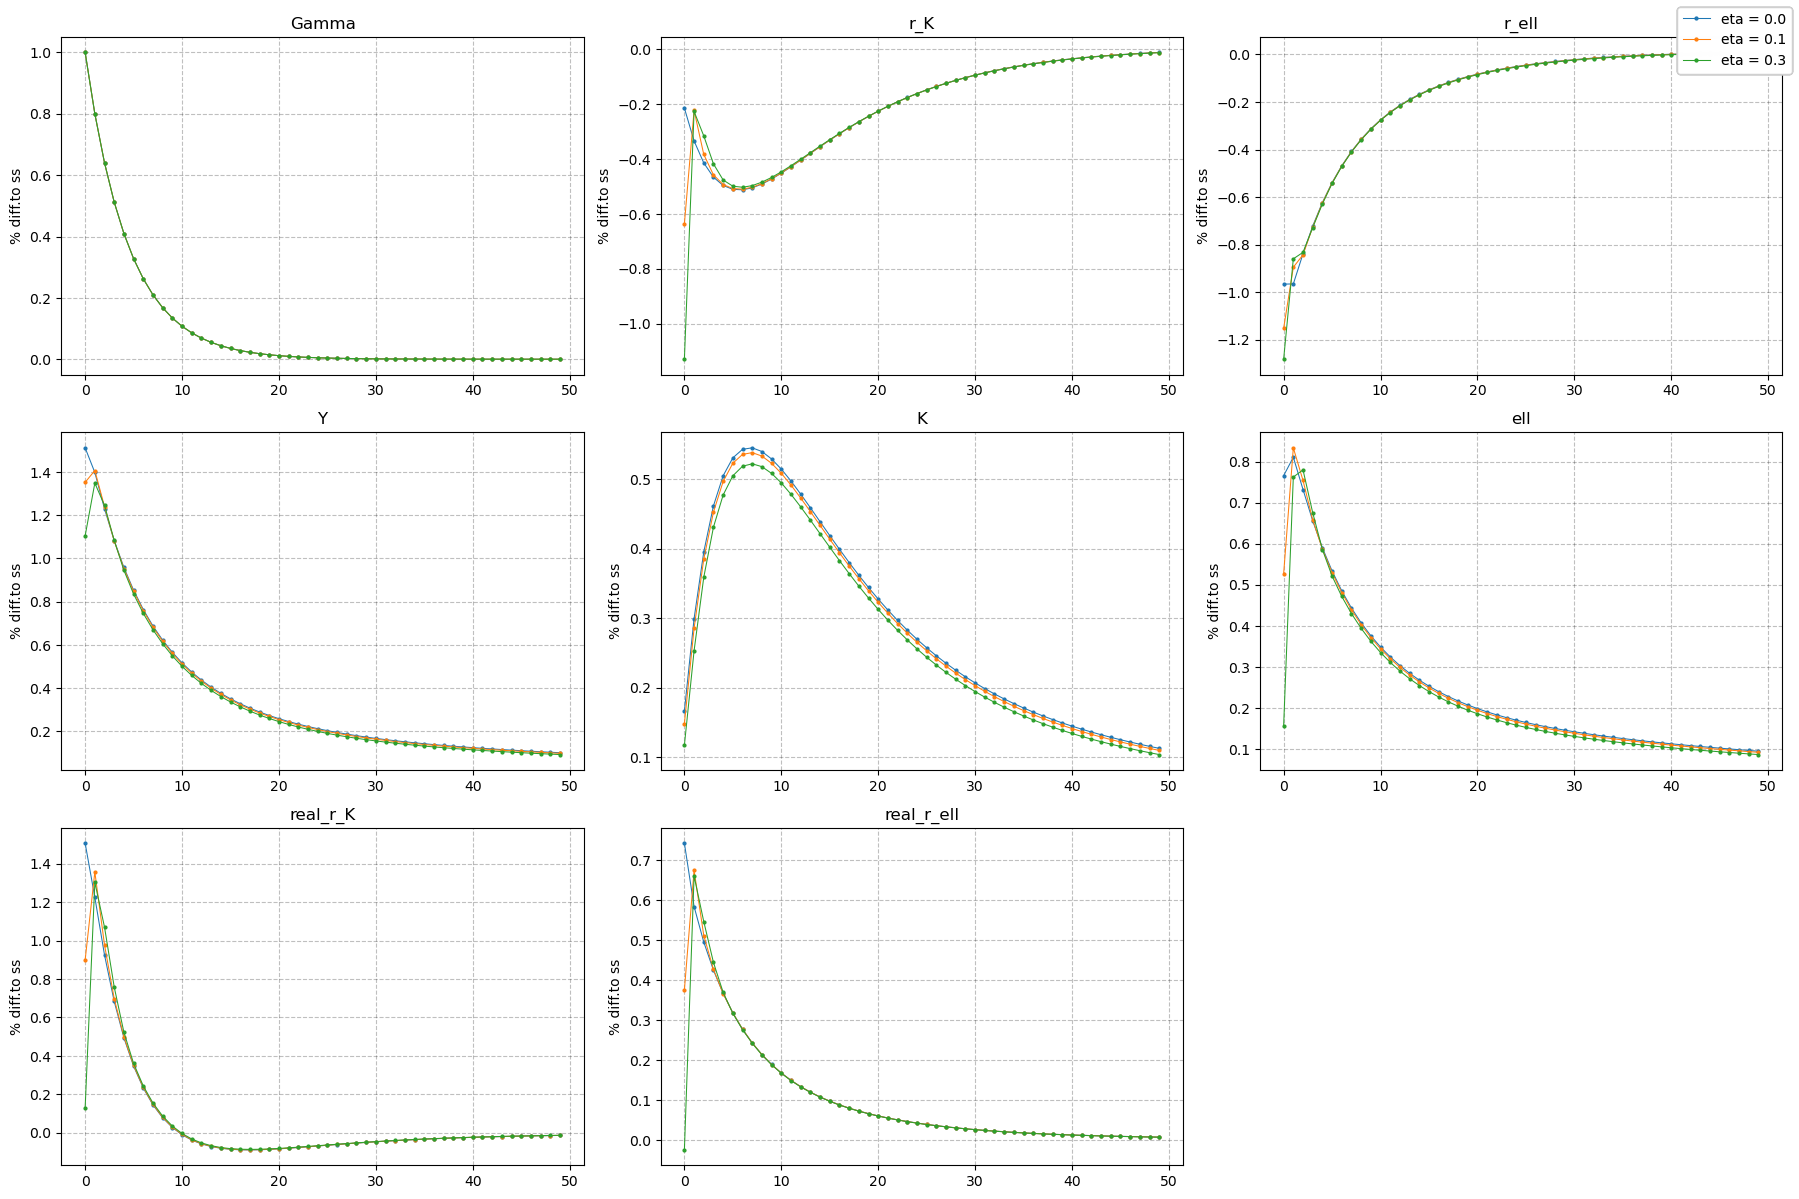

In [7]:
model.plot_IRF_models(models,parameter,varlist=['Gamma','r_K','r_ell','Y','K','ell','real_r_K','real_r_ell'])

#### 3.1.2. <a id='toc3_1_2_'></a>[Phillips-curve](#toc0_)

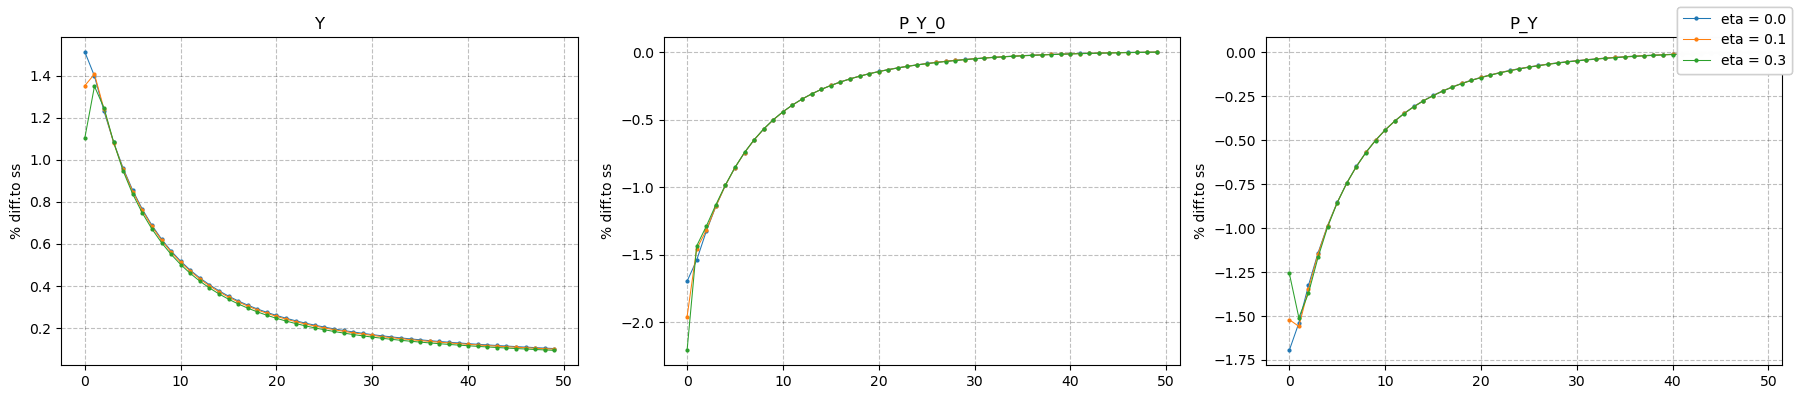

In [8]:
model.plot_IRF_models(models,parameter,varlist=['Y','P_Y_0','P_Y'])

#### 3.1.3. <a id='toc3_1_3_'></a>[Investments](#toc0_)

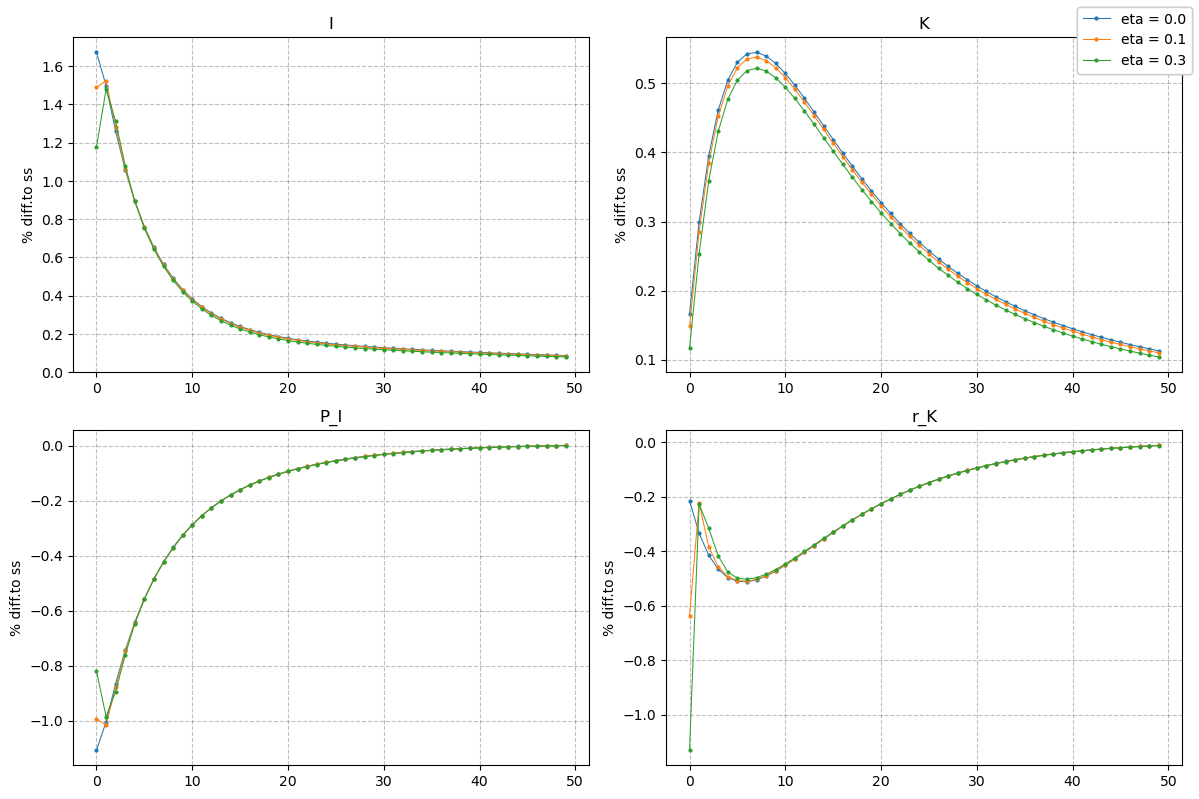

In [9]:
model.plot_IRF_models(models,parameter,varlist=['I','K','P_I','r_K'],ncol=2)